### Biblioteki, stałe i ładowanie danych

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import processing

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from db.gateway import ChartsGateway

In [2]:
plt.style.use('seaborn')

In [3]:
# Load data from DB
df = processing.get_tracks_with_genres()
charts_gw = ChartsGateway()
df_charts = charts_gw.fetch_all()

### Wstępna eksploracja

In [4]:
df.head()

title  \
id                                                                 
3JHpk0DOTOzyh0777JFAky                                     Diosa   
61qYXh7HvnjjT1GfTzo9Ld                                      Amen   
6y8fHHwkvcmXKpxCB34y68  Henkilökohtaisesti (Vain elämää kausi 8)   
3jipFRgLyKK0oJoG1pKicx                                     Jaded   
6Y3hqLC16tJUEI4PDsusoT                          3ach9ek Criminel   

                        danceability  energy   key  loudness  mode  \
id                                                                   
3JHpk0DOTOzyh0777JFAky         0.801   0.745   6.0    -3.733   0.0   
61qYXh7HvnjjT1GfTzo9Ld         0.835   0.644   7.0    -6.175   1.0   
6y8fHHwkvcmXKpxCB34y68         0.659   0.641   0.0    -6.435   1.0   
3jipFRgLyKK0oJoG1pKicx         0.766   0.272   0.0    -5.696   1.0   
6Y3hqLC16tJUEI4PDsusoT         0.593   0.637  10.0    -8.613   0.0   

                        speechiness  acousticness  instrumentalness  liveness  \
id                                                                              
3JHpk0DOTOzyh0777JFAky       0.0630        0.3980          0.006030    0.1530   
61qYXh7HvnjjT1GfTzo9Ld       0.1490        0.1130          0.000002    0.1010   
6y8fHHwkvcmXKpxCB34y68       0.0240        0.0857          0.000000    0.1490   
3jipFRgLyKK0oJoG1pKicx       0.0410        0.0366          0.000000    0.1750   
6Y3hqLC16tJUEI4PDsusoT       0.0899        0.1150          0.000000    0.0971   

                        valence    tempo  duration_ms  time_signature  \
id                                                                      
3JHpk0DOTOzyh0777JFAky    0.245  104.965     214013.0             4.0   
61qYXh7HvnjjT1GfTzo9Ld    0.410  120.007     364009.0             4.0   
6y8fHHwkvcmXKpxCB34y68    0.769  101.951     180773.0             4.0   
3jipFRgLyKK0oJoG1pKicx    0.037  116.036     262453.0             4.0   
6Y3hqLC16tJUEI4PDsusoT    0.370   77.550     172000.0             4.0   

                                                                   genres  
id                                                                         
3JHpk0DOTOzyh0777JFAky                    [trap latino, latin, reggaeton]  
61qYXh7HvnjjT1GfTzo9Ld  [south african hip hop, south african pop, kas...  
6y8fHHwkvcmXKpxCB34y68  [suomi rock, finnish pop, finnish hip hop, isk...  
3jipFRgLyKK0oJoG1pKicx  [canadian hip hop, hip hop, canadian pop, toro...  
6Y3hqLC16tJUEI4PDsusoT                                              [rai]

In [5]:
print(f"Wymiary zbioru danych: {df.shape}")

Wymiary zbioru danych: (84121, 15)


In [6]:
# Max number of tracks take into account
n_total = len(df_charts)*200
print(f"Liczba wszystkich dostępnych miejsc w top listach: {n_total}")

Liczba wszystkich dostępnych miejsc w top listach: 3447400


**Wstępnie można zaobserwować występowanie tych samych utworów w ramach wielu rankingów.**

In [7]:
df_charts.groupby(by='country_code').size()

country_code
ae    172
ar    270
at    271
au    271
be    271
     ... 
ua     86
us    271
uy    271
vn    208
za    208
Length: 71, dtype: int64

**Informacje o rankingach są niepełne dla takich państw jak Białoruś (3), Indie (158), Emiraty Arabskie (172), Egipt (172) oraz Izrael (208).**

In [8]:
drop_cols = ['title', 'key', 'mode', 
             'time_signature', 'genres']
df_numeric = df.drop(drop_cols, axis=1)
df_numeric.dropna(inplace=True)
features = list(df_numeric.columns)
x = df_numeric.to_numpy()
x = StandardScaler().fit_transform(x)

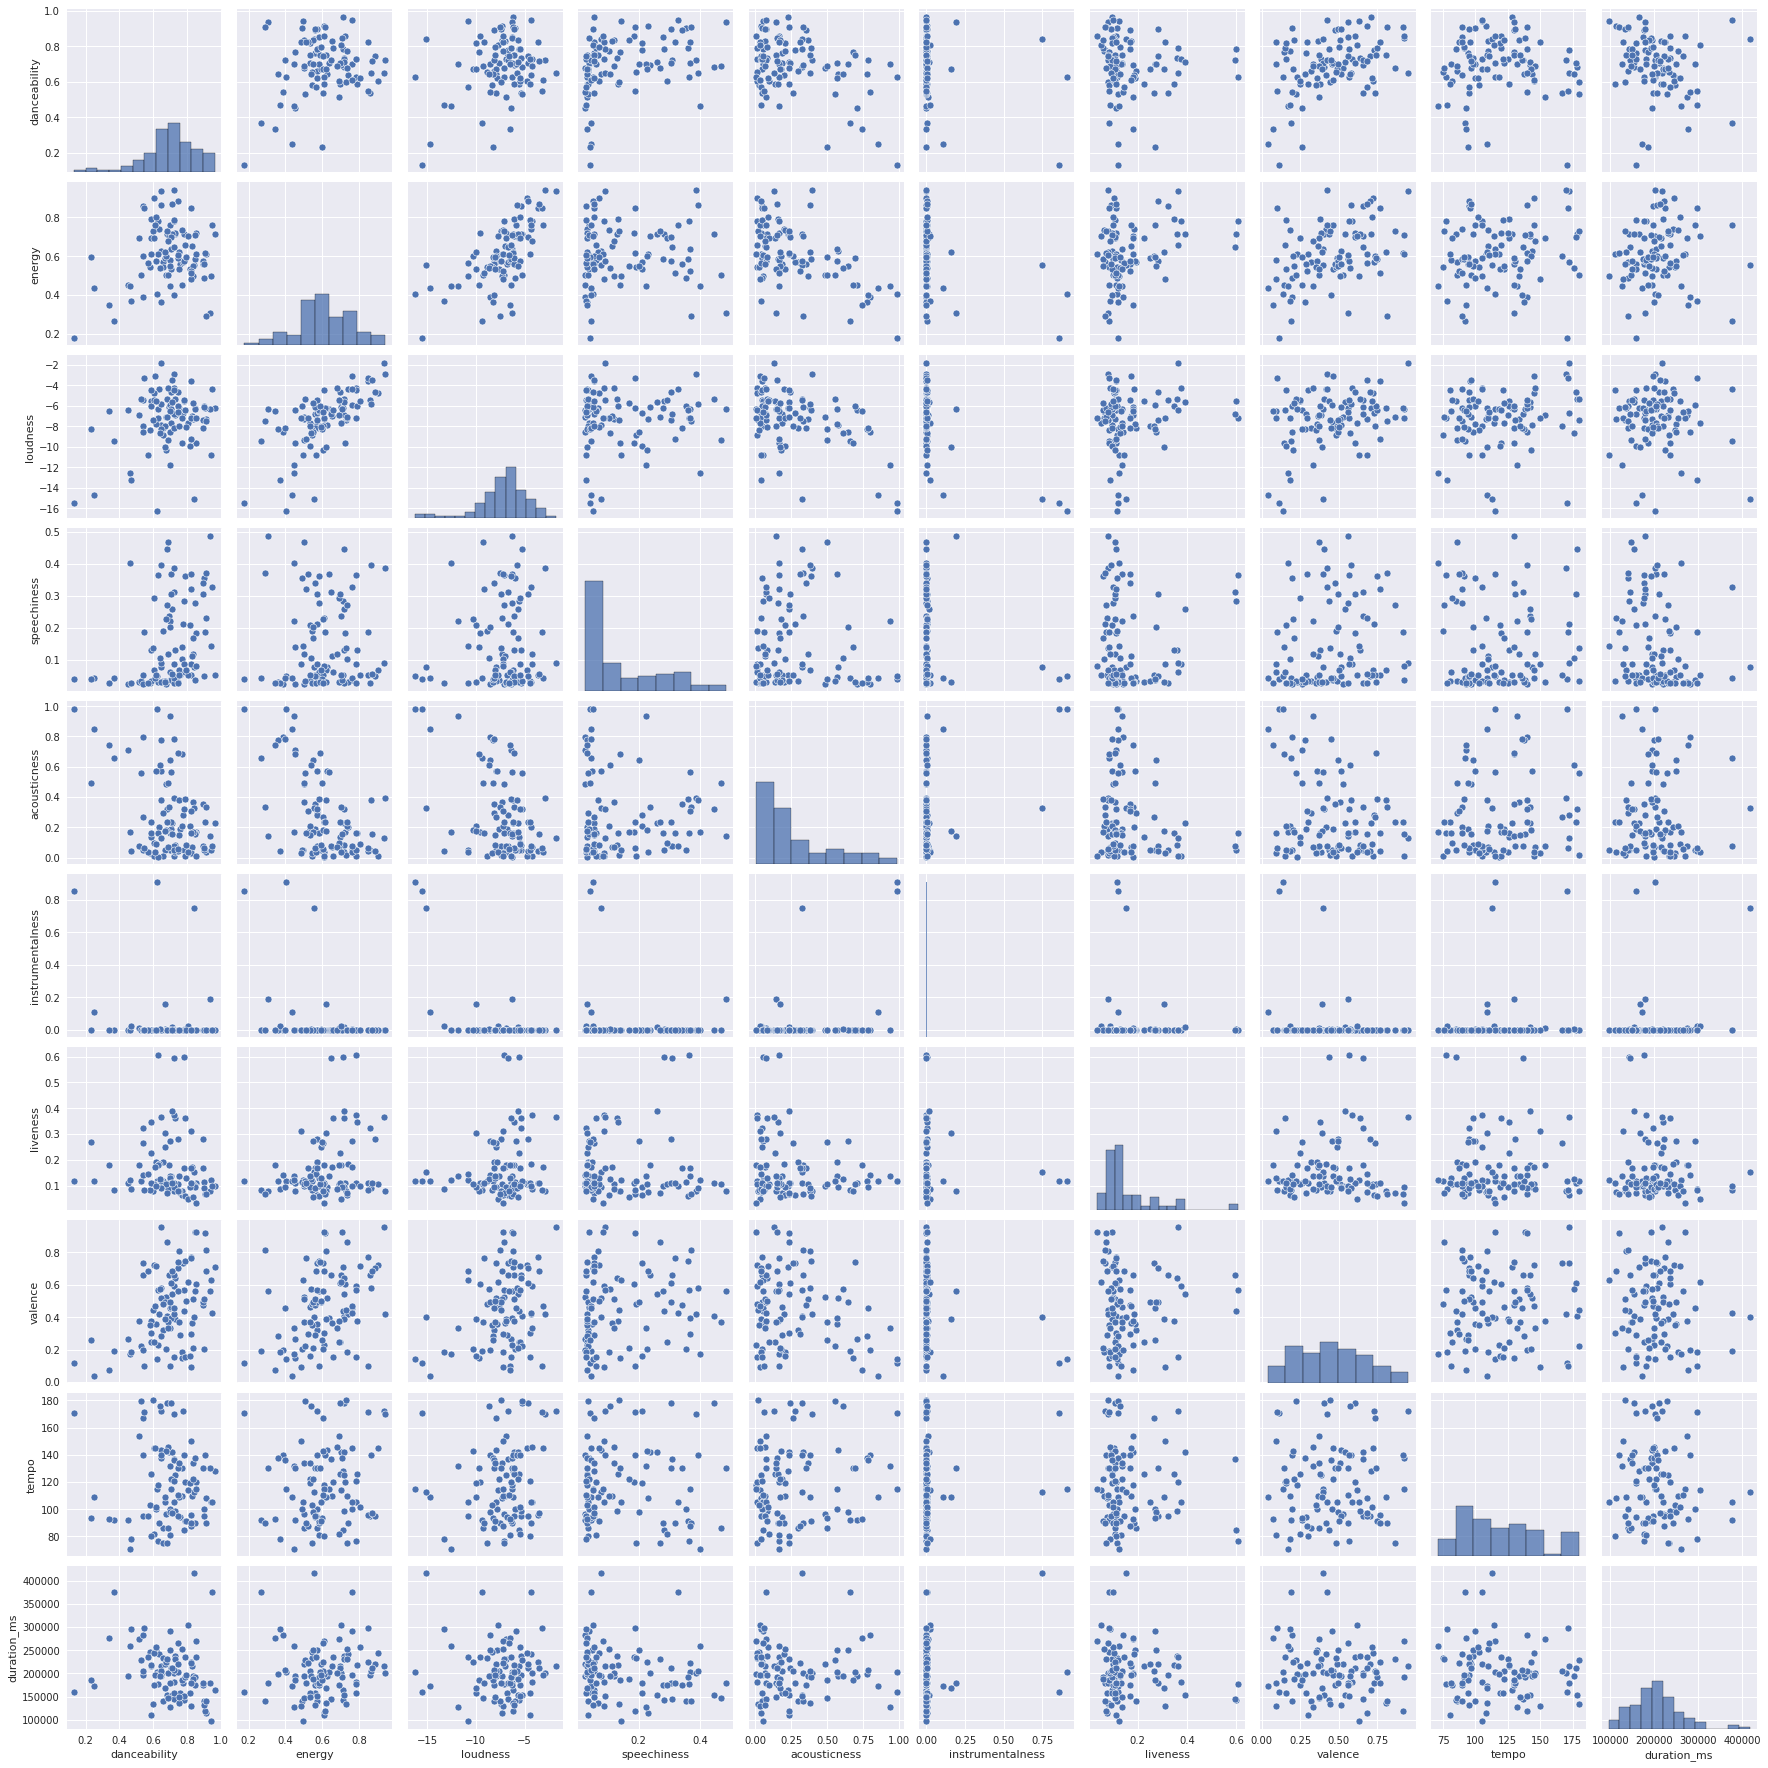

In [9]:
sns.pairplot(df.sample(n=100).drop(drop_cols, axis=1));

**Cechy audio nie są skorelowane (zauważalna korelacja jedynie dla `energy` i `loudness`), charakteryzują się różnymi rozkładami.**

### PCA

In [10]:
pca = PCA()
x_pca = pca.fit_transform(x)

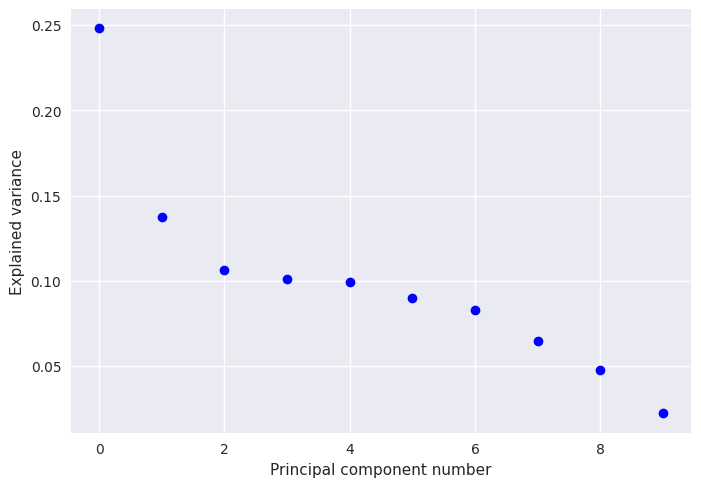

In [11]:
plt.plot(pca.explained_variance_ratio_, 'bo')
plt.xlabel('Principal component number')
plt.ylabel('Explained variance')
plt.show()

**Poszczególne komponenty zachowują względnie dużo informacji - zbiór jest złożony.**

In [12]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')

projected_features = {}

for i in range(0, pc1.shape[0]):
    print(features[i] + ' : ' + repr(pc1[i]) + ' : ' + repr(pc2[i]))
    projected_features[features[i]] = (pc1[i], pc2[i])

Attribute, PC1, PC2
danceability : -0.287545486853366 : -0.5322226673501348
energy : -0.5397851966230109 : 0.23307996649226898
loudness : -0.4995485450231023 : 0.28658486209455053
speechiness : -0.10274315482961499 : -0.4796018811074988
acousticness : 0.41426184801556226 : -0.07626269897984653
instrumentalness : 0.1937099764238037 : -0.029055640511998663
liveness : -0.09925021763026812 : 0.21939739845819928
valence : -0.3565092517226398 : -0.2066619435854209
tempo : -0.0705453508190999 : 0.10900488748357091
duration_ms : 0.12158164879953826 : 0.4907924629227487


**Wartości elementów są stosunkowo duże dla wszystkich cech, oprócz cechy `tempo`.**

In [13]:
# Scale component values down for clarity
x_pca[:, 0] /= np.amax(x_pca[:, 0])
x_pca[:, 1] /= np.amax(x_pca[:, 1])

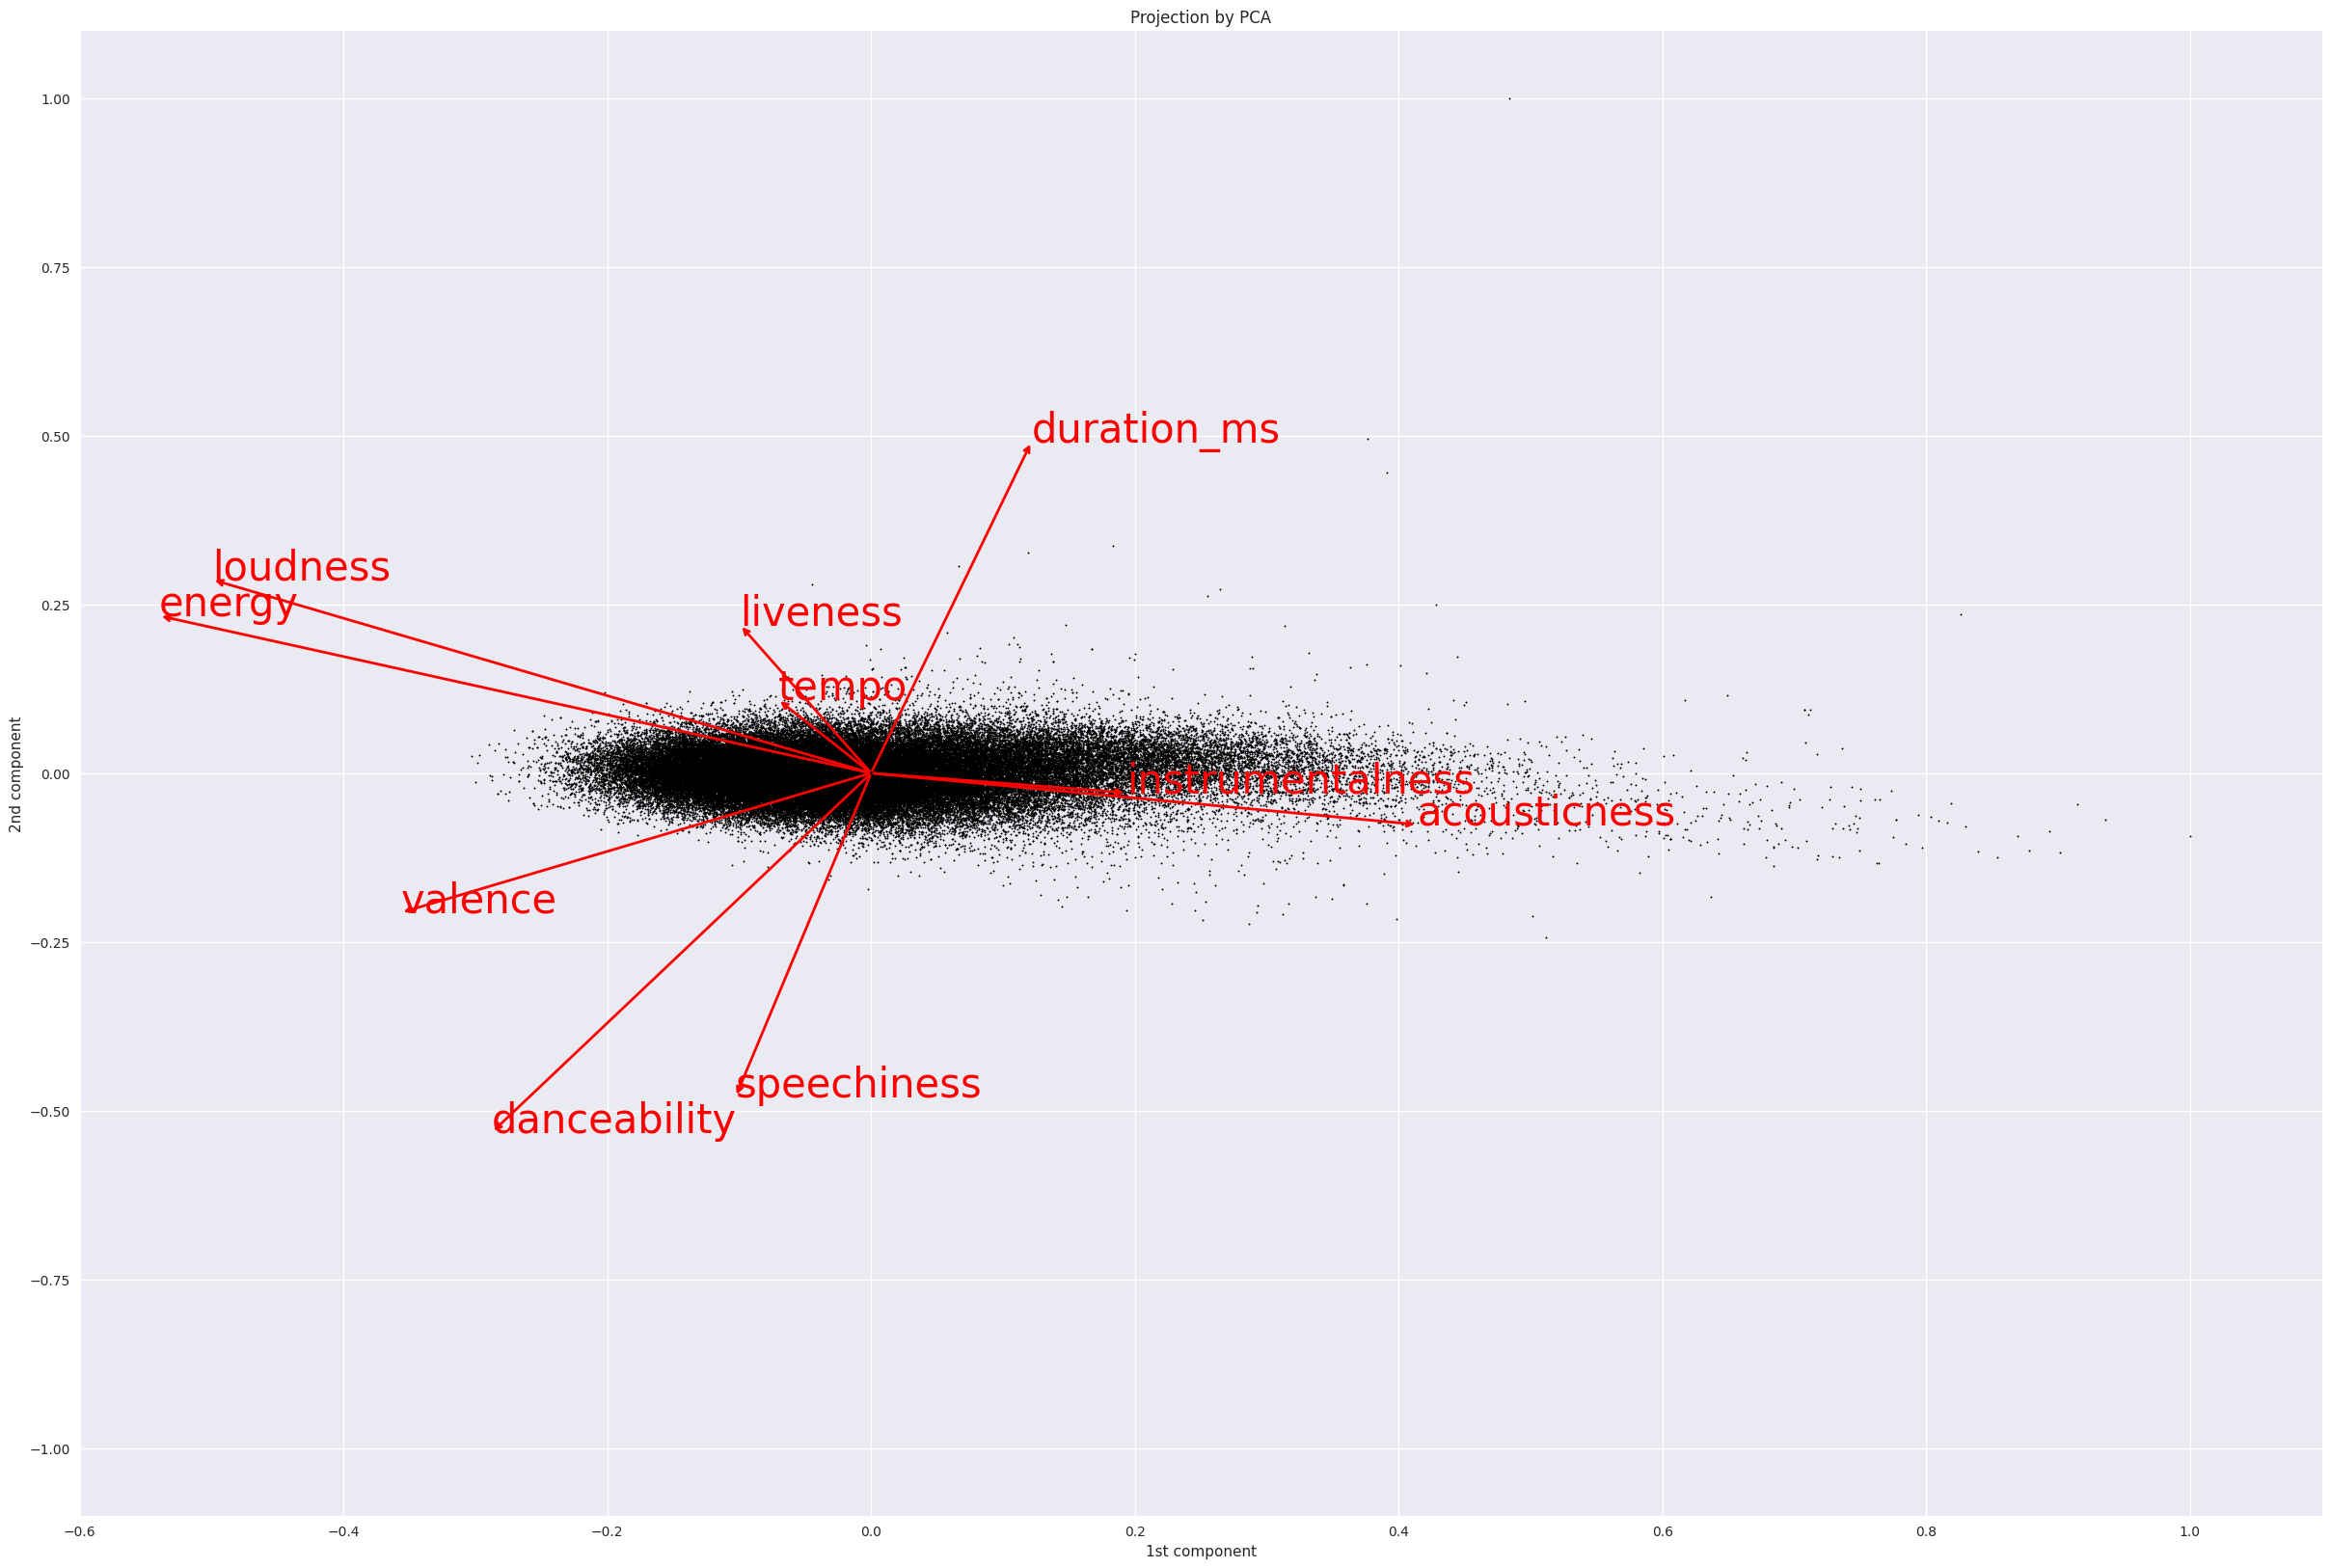

In [14]:
plt.figure(figsize=(30, 20))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='k', s=1)

for feature_name, coords in projected_features.items():
    plt.annotate('', xy=coords, xytext=(0, 0), arrowprops=dict(arrowstyle='->', color='r', lw=2))
    plt.text(x=coords[0], y=coords[1], s=feature_name, fontsize=30, color='r')

plt.title('Projection by PCA')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.ylim(-1.1, 1.1)
plt.xlim(-0.6, 1.1)
plt.show()

**Przestrzeń jest rozciągana głównie przez to, jak utwory są głośne i energiczne oraz jak bardzo są akustyczne.**

### Zmienność cech w czasie

In [15]:
features_names = df_numeric.columns
df_week = processing.get_charts('gl').merge(df, left_on='track_id', right_index=True)
df_means = df_week[['date', *features_names]].groupby(by='date').mean()

In [16]:
# Scale all to [0, 1] for visualization purposes
scaler = MinMaxScaler()
df_means[df_means.columns] = scaler.fit_transform(df_means.to_numpy())

In [17]:
fig = px.line(df_means, x=df_means.index, y=df_means.columns)
fig.update_layout(
    title='Średnie natężenia cech audio w czasie (rankingi globalne)',
    xaxis_title='Czas',
    yaxis_title='Natężenie cechy')
fig.show()

Obserwacje:

1. Sezonowość (Boże Narodzenie):
* coroczny spadek natężenia taneczności, energii, głośności i niewokalności utworów przed Świętami Bożego Narodzenia (i szybki wzrost przed nowym rokiem), wzrost natężenia akustyczności i pogodności utworów.


2. Trendy:
* spadek taneczności utworów (prawdopodobnie w związku z pandemią);
* spadek stosunku mowy do muzyki (prawdopodobnie z powodu wzrostu popularności podcastów i powstania dedykowanych serwisów);
* wzrost pogodności utworów od początku pandemii;
* spadek średniej długość utworów na przestrzeni ostatnich lat;
* wzrost akustyczności utworów na przestrzeni ostatnich lat.